### `Lab 01`

In [1]:
import pandas, warnings, os, urllib, pathlib

import numpy as np

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

#### `Helper`

In [2]:
def GitFile(local, user, repo, folder, gitfile, branch='main'):
  """
  Download GitHub Raw File if Unavailable Locally
  """
  if not os.path.exists(local):

    url = f"https://raw.githubusercontent.com/{user}/{repo}/{branch}/{folder}/{gitfile}"

    urllib.request.urlretrieve(url, local)

  return pathlib.Path(local)

In [3]:
GitFile("Helper.py", "Kelnit", "Int", "Jar", "Helper.py", "master")

PosixPath('Helper.py')

#### `Origin`

In [4]:
data = "airline.csv"

airline = pandas.read_table(data, sep=",", parse_dates=["Month"])

airline.iloc[:5]

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
airline.columns = ["Month", "Monthly Passengers"]

airline = airline.set_index("Month")

airline.iloc[:5]

,Monthly Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
airline.tail()

,Monthly Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [7]:
null = airline.isnull().sum()

null.sum()

np.int64(0)

In [8]:
airline.index.min()

Timestamp('1949-01-01 00:00:00')

In [9]:
airline.index.max()

Timestamp('1960-12-01 00:00:00')

In [10]:
total = airline.shape[0]

total

144

🚀 Ch.01 Result

Our Airline Table is From January 1949 to December 1960

Our Airline Table is Clear of Missing Value

### Ch.02 : Airline Table Opener

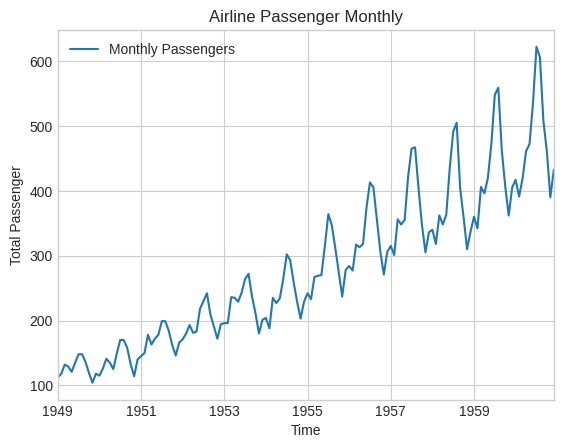

In [11]:
title = "Airline Passenger Monthly"

xlabel = "Time"

ylabel = "Total Passenger"

airline.plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

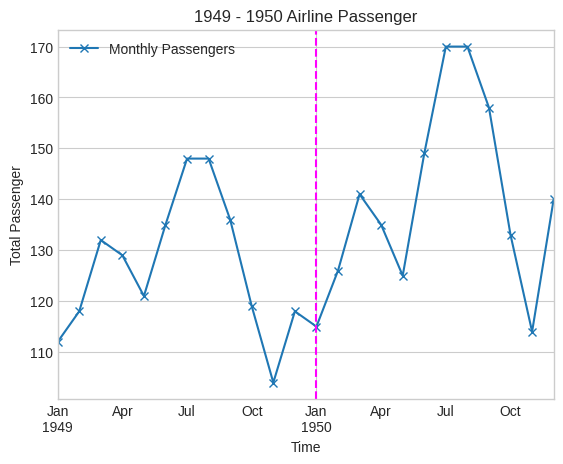

In [12]:
title = "1949 - 1950 Airline Passenger"

xlabel = "Time"

ylabel = "Total Passenger"

series = airline["1949-01-01":"1950-12-31"]

axes = series.plot.line(title=title, xlabel=xlabel, ylabel=ylabel, marker="x")

axes.axvline("1950-01-01", color="magenta", linestyle="--");

On 1949 and 1950, There are Seasonality on Yearly Basis

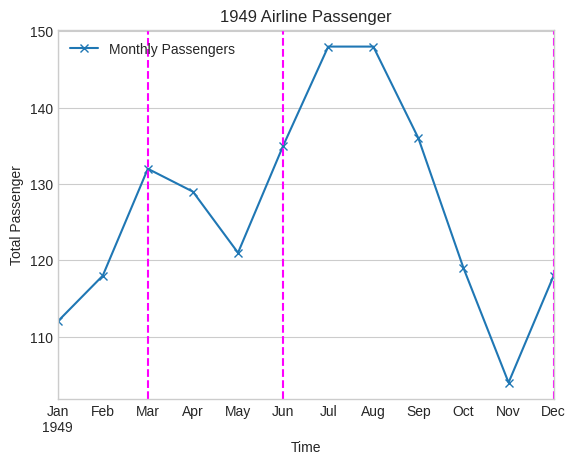

In [13]:
title = "1949 Airline Passenger"

xlabel = "Time"

ylabel = "Total Passenger"

series = airline["1949-01-01":"1949-12-01"]

axes = series.plot.line(title=title, xlabel=xlabel, ylabel=ylabel, marker="x")

for lab in ["1949-03", "1949-06", "1949-12"]:

  axes.axvline(lab, color="magenta", linestyle="--")

Our Total Monthly Passengers Increased on March, June, and December and Decreased on May and September

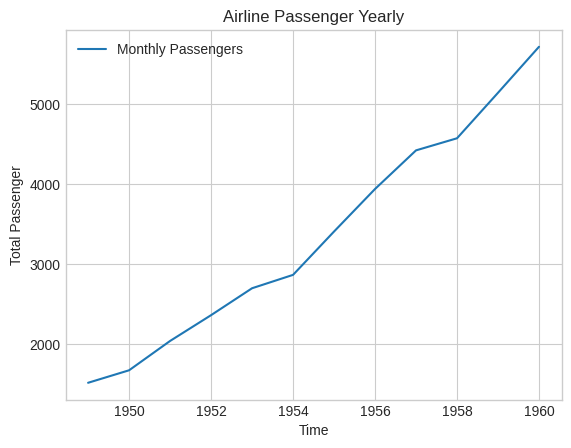

In [14]:
total = airline.groupby(airline.index.year).sum()

title = "Airline Passenger Yearly"

total.plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

🚀 Ch.02 Plot Result

Our Airline Table is in January 1949 to December 1960

Over the Years, Our Monthly Total Passengers Trend is Increasing and also Having Consistent Seasonality

Main Reason on Our Monthly Total Passengers Seasonality is Holiday

On June to August, in the Northern Hemisphere is Summer Holiday. On December, is Christmas and New Year Eve

### Ch.03 : Airline Test

In [15]:
from statsmodels.tools.sm_exceptions import ValueWarning

from statsmodels.tsa.seasonal import seasonal_decompose

warnings.simplefilter('ignore', ValueWarning)

airline_report = seasonal_decompose(airline)

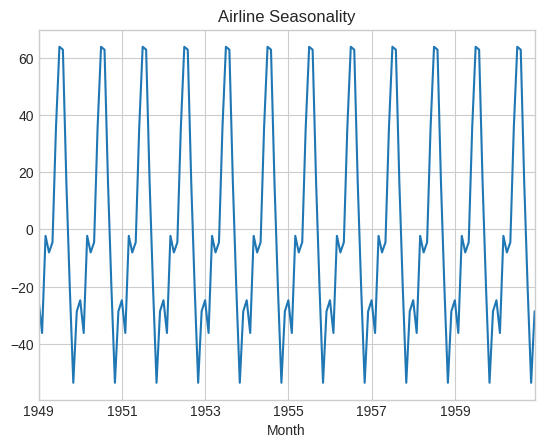

In [16]:
title  = "Airline Seasonality"

airline_report.seasonal.plot(title=title);

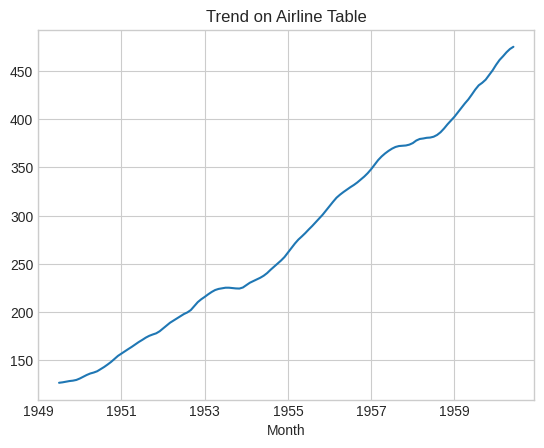

In [17]:
title  = "Trend on Airline Table"

airline_report.trend.plot(title=title);

In [18]:
# Original Airline ADF Test

from Helper import *

is_stationary, adf = FullTest(airline)

bool(is_stationary), float(adf)

(False, 0.8153688792060498)

In [19]:
is_stationary, adf = FullTest(airline.diff().dropna())

bool(is_stationary), float(adf)

(True, -2.8292668241700047)

Initially, Our Airline Table *isn't Stationary*. Our Airline *is Stationary at First Order Diff*

We'll Use Sample Satu Table to ACF & PACF Plot

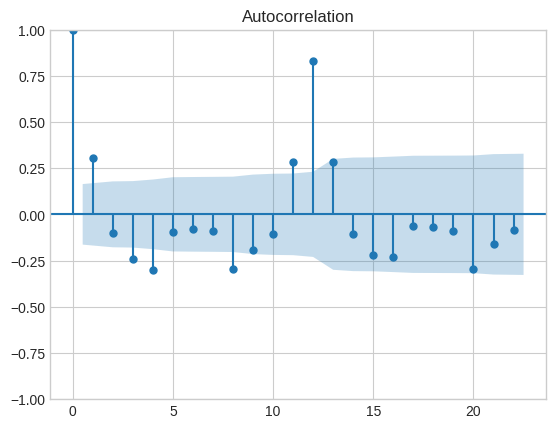

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sample_satu = airline.diff().dropna()

plot_acf(sample_satu);

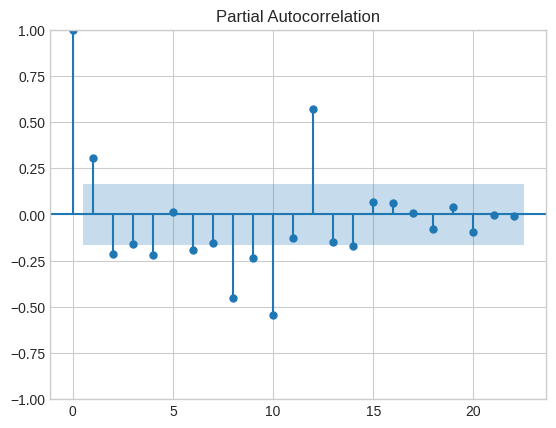

In [21]:
plot_pacf(sample_satu);